In [47]:
import numpy as np
import pandas as pd

In [41]:
# Загружаем данные в переменную df из файла homework.csv

In [42]:
df = pd.read_csv('homework.csv')

In [43]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [44]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<Axes: >

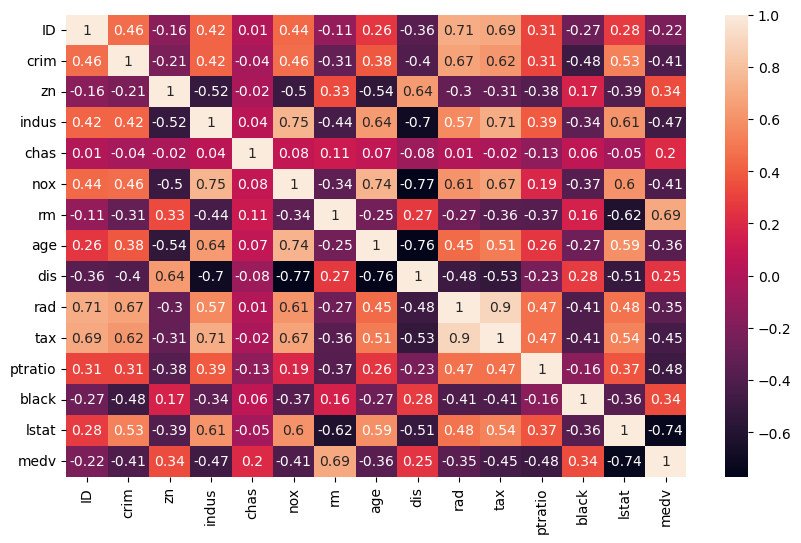

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Построить scatter график по параметрам crim, medv

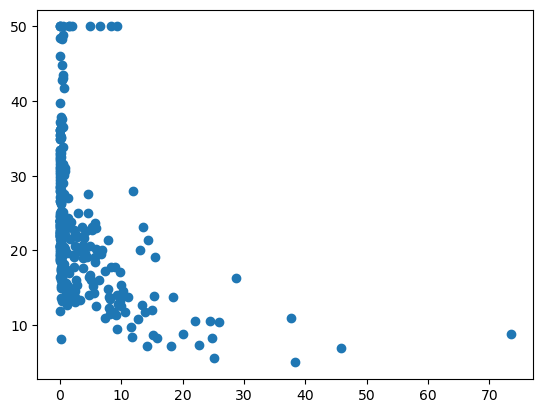

In [13]:
plt.scatter(df['crim'], df['medv'])

In [ ]:
# Построить scatter график по параметрам rm, medv

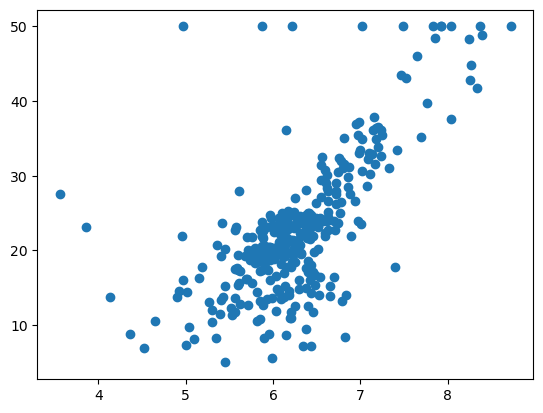

In [14]:
plt.scatter(df['rm'], df['medv'])

In [25]:
# Сформировать X и y из df, выбрав нужные колонки

In [ ]:
# Для решения задачи прогнозирования средней стоимости дома в Бостоне, сформированы X и y из df, 
# на тепловой карте sns.heatmap видно что переменная medv - Средняя стоимость домов, 
# занимаемых владельцами, в 1000 долларов США, имеет высокую корреляцию с двумя другими переменными:
# lsat - % более низкого статуса населения(-0.74 высокая отрицательная корреляция)  и 
# rm - среднее количество комнат в жилище(0.69 высокая положительная корреляция)
# возьмом эти данные для обучения модели

In [48]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Разбить данные на данные для обучения и проверки

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# Создать и обучить модель LinearRegression

In [61]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)
#model.predict(X)

0.6343339677660715

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
# Оценить качество на тестовой выборки

In [65]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mse

30.679308942517157

In [66]:
# Для решения задачи прогнозирования nox, уровня оксида азота, на тепловой карте видно, что
# nox - уровня оксида азота, имеет высокую корреляцию с переменными:
# indus - доля площадей под неторговую деятельность на город (0.75 высокая положительная корреляция)
# dis – взвешенные расстояния до пяти центров занятости Бостона.(-0.77 высокая отрицательная корреляция)  и 
# возьмом эти данные для обучения модели

In [67]:
X1 = pd.DataFrame(np.c_[df['indus'], df['dis']], columns = ['indus','dis'])
y1 = df['nox']

In [68]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [69]:
model1 = LinearRegression()
model1.fit(X1, y1)
model1.score(X1, y1)

0.6787350496817873

In [71]:
y_pred1 = model1.predict(X1)
mse1 = mean_squared_error(y1, y_pred1)
mse1

0.0042326193551385505